In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

In [ ]:
#displaying top 5 entries of dataset to get an idea about dataset 
df.head (5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#displaying last 5 entries of the dataset
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.shape

(3333, 20)

In [ ]:
#checking information about dataset & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Checking Null Values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
#Summary Statastics
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#how many unique states we have in our dataset
df['State'].nunique() 

51

In [ ]:

total_churn= df.loc[df["Churn"]== True]
total_churn.head (5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


***We have lost approximately 15% (14.5%) of our subscribers as per the given data set. We have to study those people who stopped using services of company. Also we neeed to do some sort of customer reactivation to overcome this loss.***




In [ ]:
high_day_min=df.loc[df["Total day minutes"]>= 290] # Most of the times whenever total day minutes is high then probability of getting churn is so high#
high_day_min.head(5)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
76,DC,82,415,No,No,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True


In [ ]:
high_charge= df.loc[df["Total day charge"]>=45] #Most of the times whenever total day charge is high then probability of getting churn is so high#
high_charge.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3265,ID,82,415,No,No,0,266.9,83,45.37,229.7,74,19.52,251.7,99,11.33,11.0,6,2.97,3,True
3268,WA,84,415,No,No,0,289.1,100,49.15,233.8,97,19.87,223.5,148,10.06,12.7,2,3.43,2,True
3272,MD,133,510,No,No,0,295.0,141,50.15,223.6,101,19.01,229.4,109,10.32,12.9,4,3.48,2,True
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


***From this we observe that subscriber making minimum number of total local calls is calling customer service care 2 times more than average but still using company services. This shows that he/she is a loyal subscriber what we can do is we can target those subscribers by providing personalised offers.***

Text(0.5, 1.0, 'Distribution of Customer Churning ')

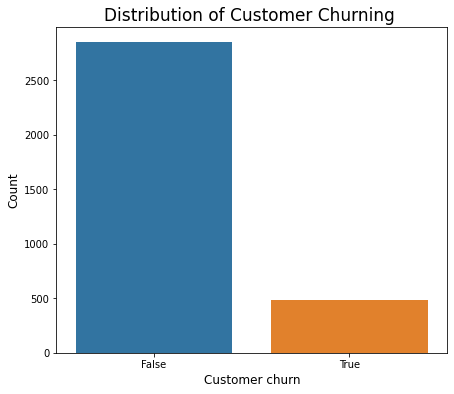

In [ ]:
#plotting graph for churn distribution
plt.figure(figsize=(7,6))
sns.countplot(x='Churn',data=df)
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 17)

***Our target variable has two categories which include True and False values. True = Customer will move or churn out, False = Customer won’t move. The occurrence of false is higher than True. There are 2850 (85.51% ) customers who churn out and 483 (14.49%) customers retained.***

In [ ]:
#defining function for comparision
def bar_compare(x,y):
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 38)
    plt.show()

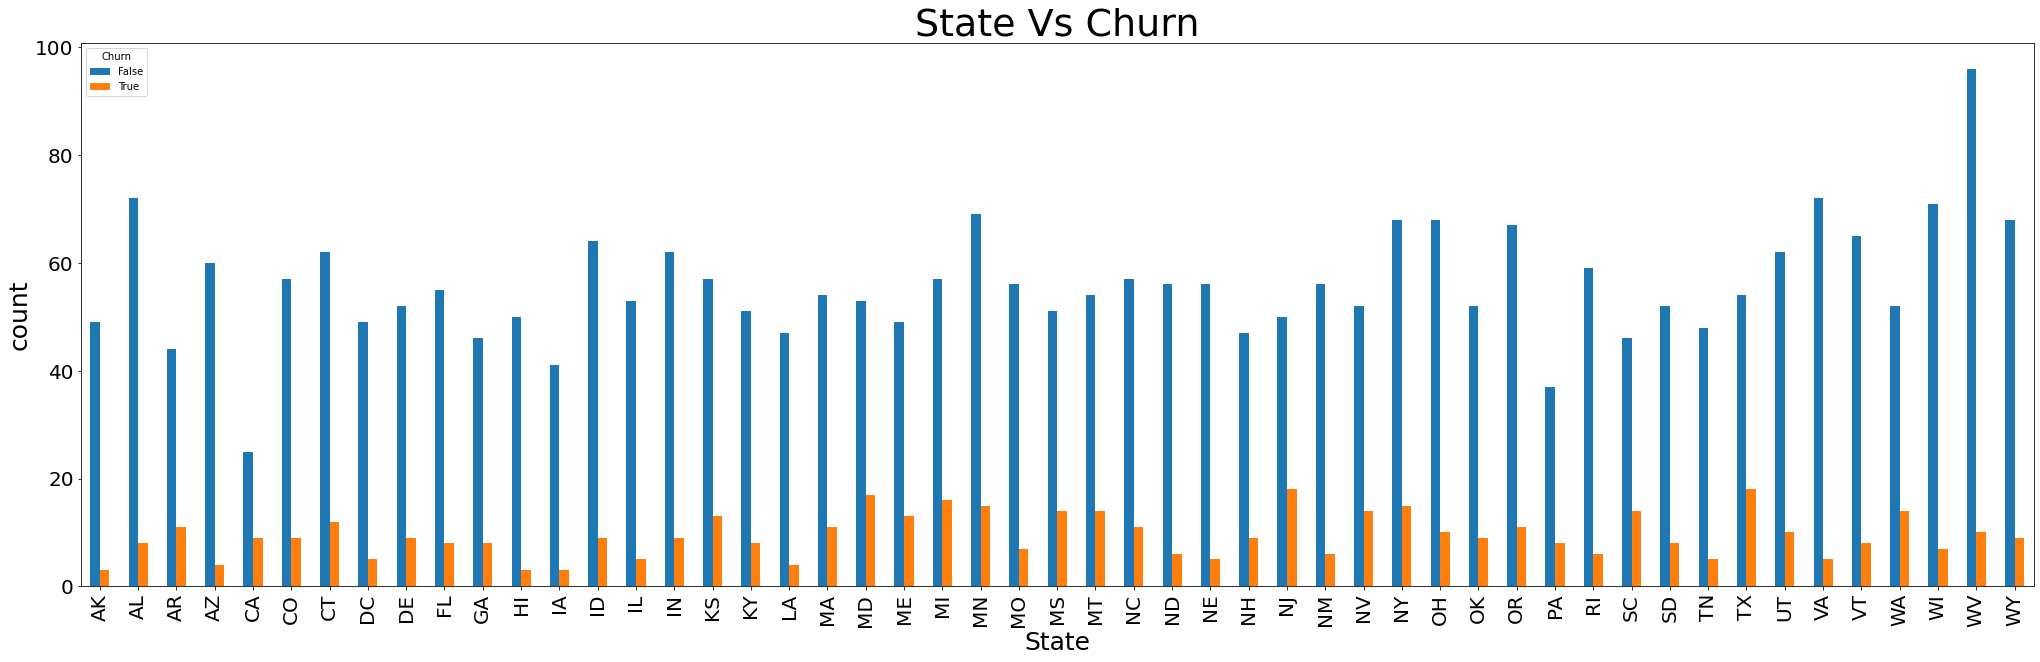

In [ ]:
#State Wise Churning of customer
bar_compare('State','Churn')

Text(0, 0.5, 'States')

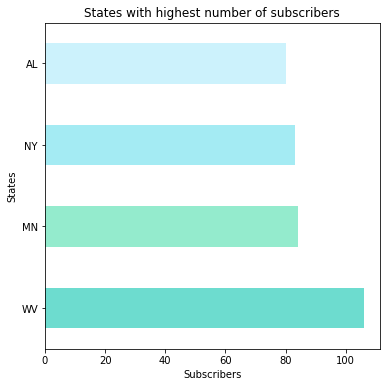

In [ ]:
#selectig high performing states
states_with_most_subscribers=df['State'].value_counts().head(4)   #gives series of first 4 states with count

 #plotting bar graph
plot = states_with_most_subscribers.plot.barh(figsize=(6, 6),color=['#6DDCCF','#94EBCD','#A4EBF3','#CCF2FC'])     

plt.title('States with highest number of subscribers')   #setting title 
#setting x and y label
plt.xlabel('Subscribers')     
plt.ylabel('States')

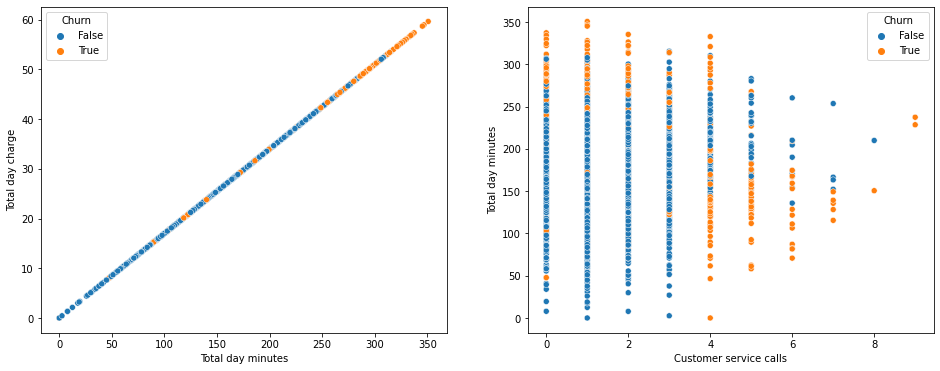

In [ ]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="Total day minutes", y = "Total day charge" , hue="Churn", data=df, ax=ax[0])
sns.scatterplot(x="Customer service calls", y = "Total day minutes" , hue="Churn", data=df, ax=ax[1])

This scatter plot is showing how total day miutes,total day charges,customer service calls impact churning rate bold text



***As Total Day Minutes, Total Charge and Customer Service Calls increasing, the Churing Rate is increasing***

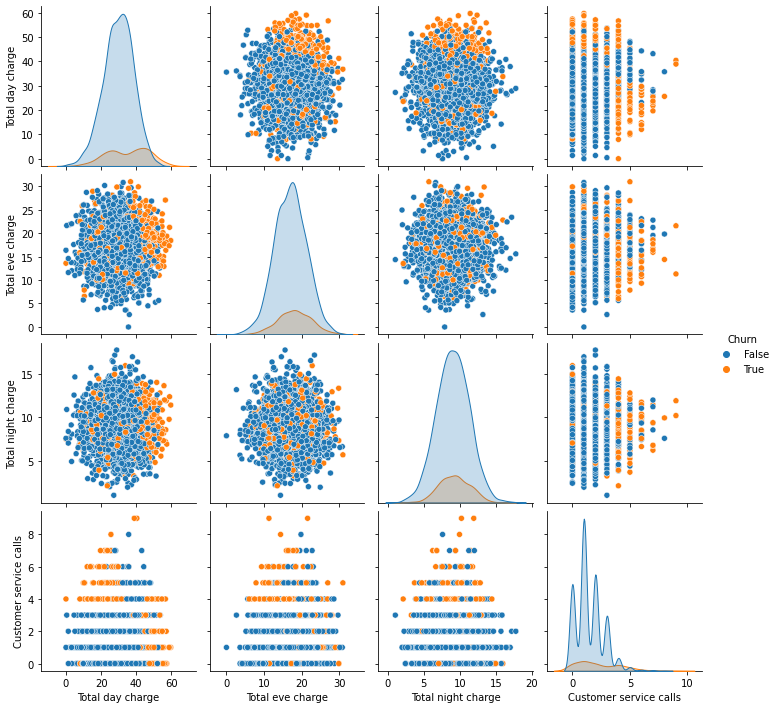

In [ ]:

cols = ["Total day charge", "Total eve charge","Total night charge", "Customer service calls", "Churn"] 
pairplot_feature = df[cols]
sns.pairplot(pairplot_feature, hue = "Churn")

**Pair plot** is a most effective way of analysing the distibution of variables and the relationship between two variables. As per given data we can easily analyse through the above pair plot that churn rate depends upon many factors;

1. In most of the cases churn rate mostly depends upon the  'Day charge' and ;'Customer Service calls'.
2. As total 'Day charge' increases churn rate is increases.
3. In 'eve charge' vs 'customer service calls' and 'night charge' vs 'customer service calls', You can easily analyse that it does not depend on eve and night charge.Churn rate increases as customer service calls increases.

# **ANALYSIS and CONCLUSION**

After analysing the dataset we can say that Customer those who are getting churned have:

1.High "total day minutes" with low customer service calls.       
2.High "total day charge".                                   
3.Low "total charge" but they call the customer service more.






# **RECOMMENDATION**

After analysing data there are some ways that can help telecom companies in degrading churing rate is;

1. They need to inspect the customer duration in every short span of time.
2. As most of the customer who are getting churned are those whose "total day min" is very high, so we can provide a high talk time offer with offers to these customers.
3. As there are lot of customer who calls to "customer service " a lot of time and getting churned and also with "low total day charge", so we can take a feedback of these customer and work on the issues that most of the customers are facing.


**SO our main focus should be on providing good talktime offers and discount to the customer who have  "High total day minutes" and "High total charge".**